In [20]:
import numpy as np
from networkx import to_numpy_matrix
import networkx as nx
zkc = nx.karate_club_graph()
order = sorted(list(zkc.nodes()))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_hat = A + I
D_hat = np.array(np.sum(A_hat, axis=0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [24]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nodelist1 = []
        nodelist2 = []
        for i in range (34):
            if zkc.nodes[i]['club'] == 'Mr. Hi':
                nodelist1.append(i)
            else:
                nodelist2.append(i)
        #nx.draw_networkx(G, pos, edges=edges);
        nx.draw_networkx_nodes(G, pos, nodelist=nodelist1, node_size=300, node_color='r',alpha = 0.8)
        nx.draw_networkx_nodes(G, pos, nodelist=nodelist2, node_size=300, node_color='b',alpha = 0.8)
        nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)

<IPython.core.display.Javascript object>


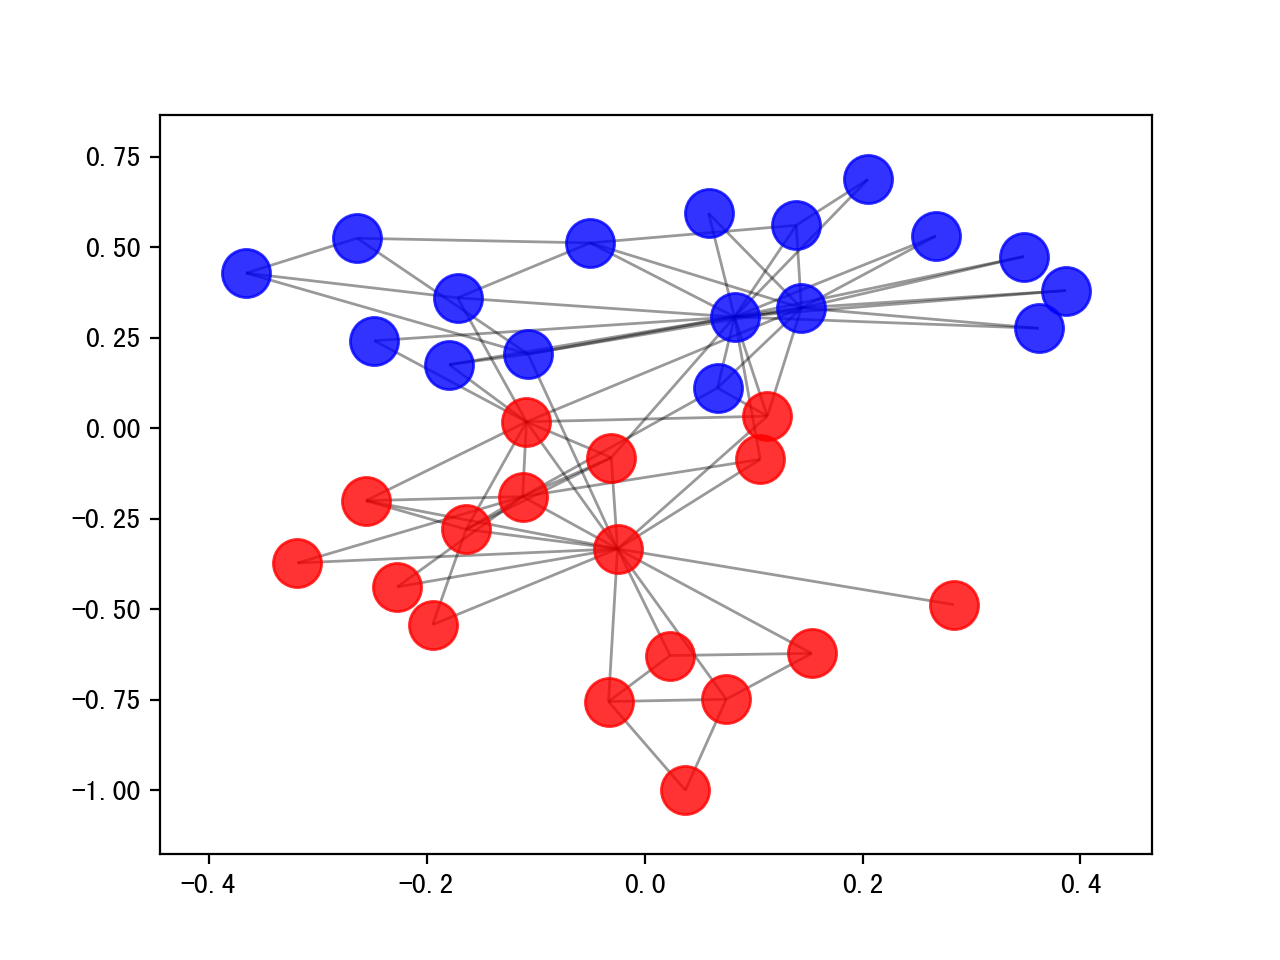

/Users/caijie/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:565: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [26]:
plot_graph(zkc)

In [31]:
W_1 = np.random.normal(loc=0,scale=1,size=(zkc.number_of_nodes(),4))
W_2 = np.random.normal(loc=0,scale=1,size=(W_1.shape[1],2))

def relu(x):
    return (abs(x)+x)/2

def gcn(D_hat,X,A_hat,W):
    return relu(D_hat**-1*A_hat*X*W)

H_1 = gcn(D_hat,I,A_hat,W_1)
H_2 = gcn(D_hat,H_1,A_hat,W_2)
output = H_2

feature_representations = {
    node: np.array(output)[node] 
    for node in zkc.nodes()}
feature_representations

{0: array([0.17316725, 0.15485933]),
 1: array([0.35673093, 0.1590224 ]),
 2: array([0.42606545, 0.18924189]),
 3: array([0.11998781, 0.12769139]),
 4: array([0.16776708, 0.1854183 ]),
 5: array([0.26892449, 0.31716022]),
 6: array([0.31187327, 0.34523961]),
 7: array([0.10408574, 0.08783403]),
 8: array([0.0257537 , 0.06887242]),
 9: array([0.4800188 , 0.28067498]),
 10: array([0.11716026, 0.23907938]),
 11: array([0., 0.]),
 12: array([0.       , 0.1409091]),
 13: array([0.21382719, 0.13734536]),
 14: array([0.26954192, 0.28380868]),
 15: array([0.25373006, 0.36027312]),
 16: array([0.45463975, 0.45201514]),
 17: array([0.04702888, 0.10923464]),
 18: array([0.38712661, 0.20017034]),
 19: array([0.15388204, 0.16259975]),
 20: array([0.15955311, 0.35076651]),
 21: array([0.03746532, 0.10339757]),
 22: array([0.40088639, 0.38652674]),
 23: array([0.65698248, 0.37757668]),
 24: array([0.51802199, 0.30623565]),
 25: array([0.53926292, 0.38728339]),
 26: array([1.17976601, 0.69390964]),
 2

<IPython.core.display.Javascript object>


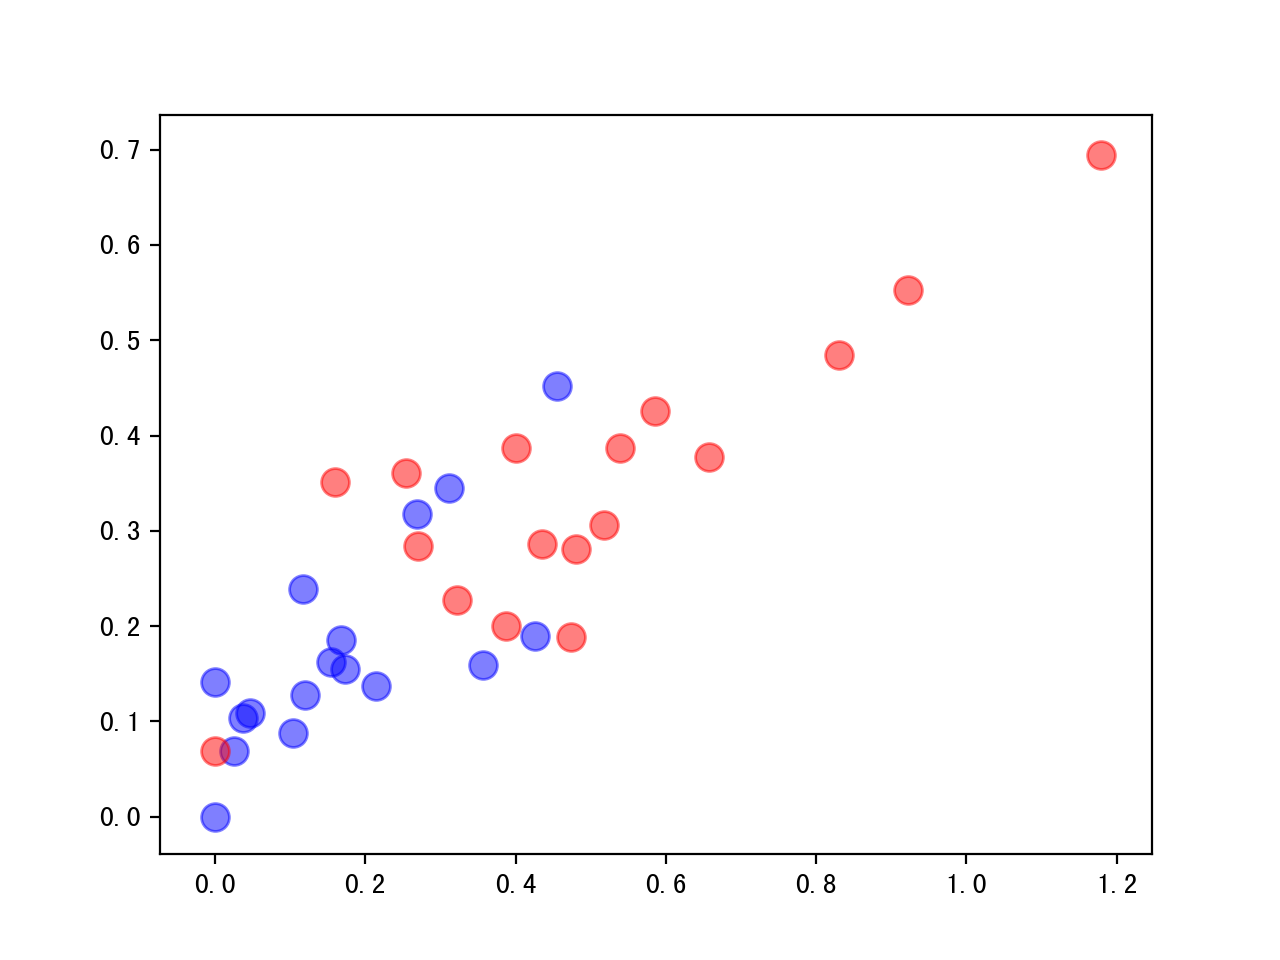

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook
for i in range (34):
    if zkc.nodes[i]['club'] == 'Mr. Hi':
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,color = 'b',alpha=0.5,s = 100)
    else:
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,color = 'r',alpha=0.5,s = 100)
#plt.scatter(np.array(output)[:,0],np.array(output)[:,1])
